In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import pandas as pd

from scipy.integrate import simps
from scipy import signal

In [2]:
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """

    ax = np.arange(-l // 2 + 1., l // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2. * sig**2))

    return kernel / np.sum(kernel)

In [3]:
ker5=gkern()
ker5.shape

(5, 5)

In [4]:
ker5

array([[ 0.00296902,  0.01330621,  0.02193823,  0.01330621,  0.00296902],
       [ 0.01330621,  0.0596343 ,  0.09832033,  0.0596343 ,  0.01330621],
       [ 0.02193823,  0.09832033,  0.16210282,  0.09832033,  0.02193823],
       [ 0.01330621,  0.0596343 ,  0.09832033,  0.0596343 ,  0.01330621],
       [ 0.00296902,  0.01330621,  0.02193823,  0.01330621,  0.00296902]])

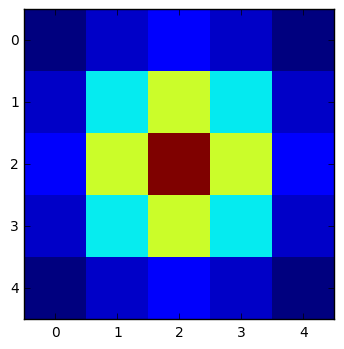

In [5]:
plt.imshow(ker5, interpolation='none')

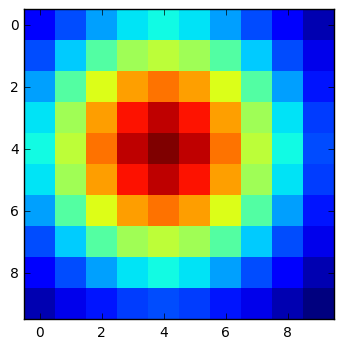

In [6]:
ker21=gkern(10, 3)
plt.imshow(ker21, interpolation='none')

In [7]:
ker21.max()

0.021766709897978014

In [8]:
x = np.linspace(0, 20, 21)
y = np.linspace(0, 20, 21)
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [9]:
simps(simps(ker21, y), x)

ValueError: If given, length of x along axis must be the same as y.

# Image + convolution with Gaussian kernel 

In [10]:
img_x=200
img_y=200
img=np.zeros((img_x,img_y))

In [11]:
crat1_x=img_x//2
crat1_y=img_y//2

crat2_x=img_x//4
crat2_y=img_y//3

crat_x_list=[crat1_x,crat2_x]
crat_y_list=[crat1_y,crat2_y]

for i in range(len(crat_x_list)):
    img[crat_x_list[i],crat_y_list[i]] +=1 # add one at crater location

In [12]:
kernel_sig=12
kernel_support=5*kernel_sig
kernel=gkern(kernel_support, kernel_sig)

In [13]:
img_conv=signal.convolve2d(img, kernel, boundary='symm', mode='same')
img_conv.shape

(200, 200)

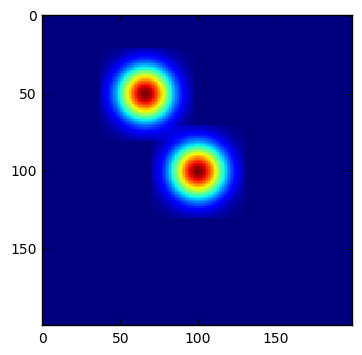

In [14]:
plt.imshow(img_conv, interpolation='none')

In [15]:
x = np.linspace(0, img_x-1, img_x)
y = np.linspace(0, img_y-1, img_y)
#x

In [16]:
simps(simps(img_conv, y), x)

1.9999999999999996

# Create Density Maps for Moon Dataset

In [23]:
filename = 'lola_00587'
data = pd.read_csv('training_set/%s.csv'%filename)
data.head()

,Diameter (km),Lat,Long,x,y,Diameter (pix)
0,5.136352,36.240861,-43.612403,100.546962,291.230564,3.696359
1,5.052276,36.263805,-43.901694,95.465240,290.554246,3.635854
2,5.898228,36.597672,-44.013961,93.730413,283.225532,4.244641
3,5.806194,36.616940,-42.899150,113.298863,283.419419,4.178408
4,5.134403,36.714642,-41.556199,136.889398,281.689772,3.694956


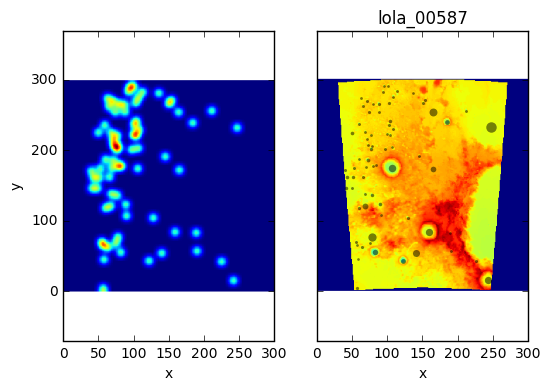

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

i=7
img_x=300
img_y=300
img=np.zeros((img_x,img_y))

img=np.zeros((img_x,img_y))
for index, row in data.iterrows():
    img[int(row[4]),int(row[3])]=1

kernel_sig=5
kernel_support=5*kernel_sig
kernel=gkern(kernel_support, kernel_sig)
img_conv = signal.convolve2d(img, kernel, boundary='symm', mode='same')

ax1.imshow(img_conv, interpolation='none')
ax2.imshow(mpimg.imread('training_set/%s.png'%filename))
for i in range(data.shape[0]):
    ax2.scatter(data['x'][i],data['y'][i],color='black',s=data['Diameter (pix)'][i],alpha=0.5,lw=0)
ax2.set_xlim([0,img_x])
ax2.set_ylim([0,img_y])
ax1.set_xlabel('x')
ax2.set_xlabel('x')
ax1.set_ylabel('y')
plt.title('%s'%filename)
plt.savefig('output_dir/Density_map_%s.png'%filename)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

img_x=300
img_y=300
img_conv=np.zeros((img_x,img_y))

for index, row in data[0:5].iterrows():
    img=np.zeros((img_x,img_y))
    img[int(row[4]),int(row[3])]=1
    kernel_sig=row[5]/2.
    kernel_support=img_x
    kernel=gkern(kernel_support, kernel_sig)
    img_conv += signal.convolve2d(img, kernel, boundary='symm', mode='same')

print "plotting..."
ax1.imshow(img_conv, interpolation='none')
ax2.imshow(mpimg.imread('%s.png'%filename))
for i in range(data.shape[0]):
    ax2.scatter(data['x'][i],data['y'][i],color='black',s=data['Diameter (pix)'][i],alpha=0.5,lw=0)
ax2.set_xlim([0,img_x])
ax2.set_ylim([0,img_y])

In [ ]:
n_craters = simps(simps(img_conv, np.linspace(0, img_y-1, img_y)), np.linspace(0, img_x-1, img_x))
print "calculated # craters = %f. Actual # craters = %d"%(n_craters, data.shape[0])

In [ ]:
np.ones((2,2)) + 2*np.ones((2,2))